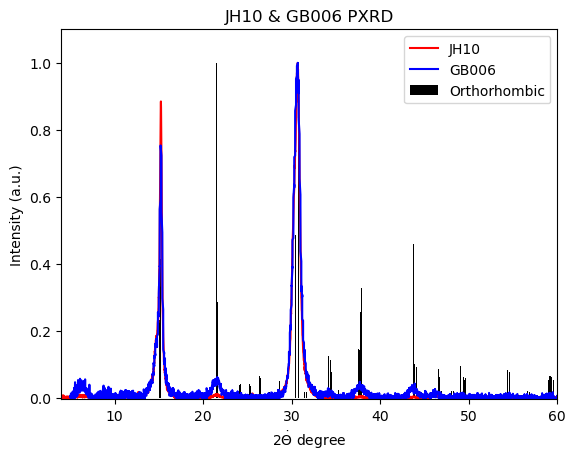

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

samp_name_1 = 'JH10'
jh_xrd_path = '/Users/josuehernandez/jh_sheldon_group/data/XRD/JH_samples/xrd_JH10.txt'

samp_name_2 = 'GB006'
gb_xrd_path = '/Users/josuehernandez/Downloads/GB006.csv'

savePath = '/Users/josuehernandez/Downloads/' + samp_name_1 + '2'

names = ['twotheta', 'yobs', 'ycal', 'bkg', 'diff', 'y_bkgr_sub', 'ycal_bkgr_sub']
jh_xrd_data = pd.read_csv(jh_xrd_path, delimiter=' ', names=('theta', 'intensity'))
gb_xrd_data = pd.read_csv(gb_xrd_path, sep=',', names=(names))
ortho_data = pd.read_csv('/Users/josuehernandez/jh_sheldon_group/data/XRD/CsPbBr3_ortho_pnma.txt', delimiter='\t', names=('theta', 'intensity'))

# JH XRD Data
j_theta = jh_xrd_data.theta
j_inten = jh_xrd_data.intensity
j_inten = j_inten / max(j_inten)

# GB XRD Data
theta = []
inten = []
for num in gb_xrd_data.twotheta[1:]: theta.append(float(num))
for num in gb_xrd_data.y_bkgr_sub[1:]: inten.append(float(num))
inten = inten / np.max(inten)

# Orthorhombic data
otheta = ortho_data.theta
ointen = ortho_data.intensity

plt.bar(otheta, ointen, color='black',width=0.1, label='Orthorhombic')
plt.plot(j_theta, j_inten, 'Red', label='JH10')
plt.plot(theta, inten, 'blue', label=samp_name_2)
plt.xlim([np.min(j_theta),np.max(j_theta)])
plt.ylim([np.min(j_inten),np.max(j_inten) + 0.1])
plt.xlabel(r"2$\dot{\Theta}$ degree")
plt.ylabel('Intensity (a.u.)')
plt.title('JH10 & GB006 PXRD')
plt.legend()
# plt.savefig(savePath, dpi=1200)
plt.show()